<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Neural_Forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
pip install --upgrade tensorflow


In [147]:
!pip install -U keras-tuner

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions

from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch
# from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

In [148]:
forest_fire = pd.read_csv('/content/forestfires.csv')
pd.set_option('display.max_columns', 31)
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [149]:
fire_data = forest_fire.drop(forest_fire.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1)

In [150]:
fire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [151]:
fire_data.shape

(517, 12)

In [152]:
fire_data.describe().T


,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [153]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [154]:
fire_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [155]:
fire_data[fire_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [156]:
# List of Numerical Variables
numerical_features = [feature for feature in fire_data.columns if fire_data[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
fire_data[numerical_features].head()

Number of numerical variables: 9


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [157]:
discrete_feature = [feature for feature in numerical_features if len(fire_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 2


In [158]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [159]:
categorical = [var for var in fire_data.columns if fire_data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [160]:
for var in categorical:

    print(fire_data[var].value_counts())

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64
day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64
size_category
small    378
large    139
Name: count, dtype: int64


In [162]:
for var in categorical:

    print(var, ' contains ', len(fire_data[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


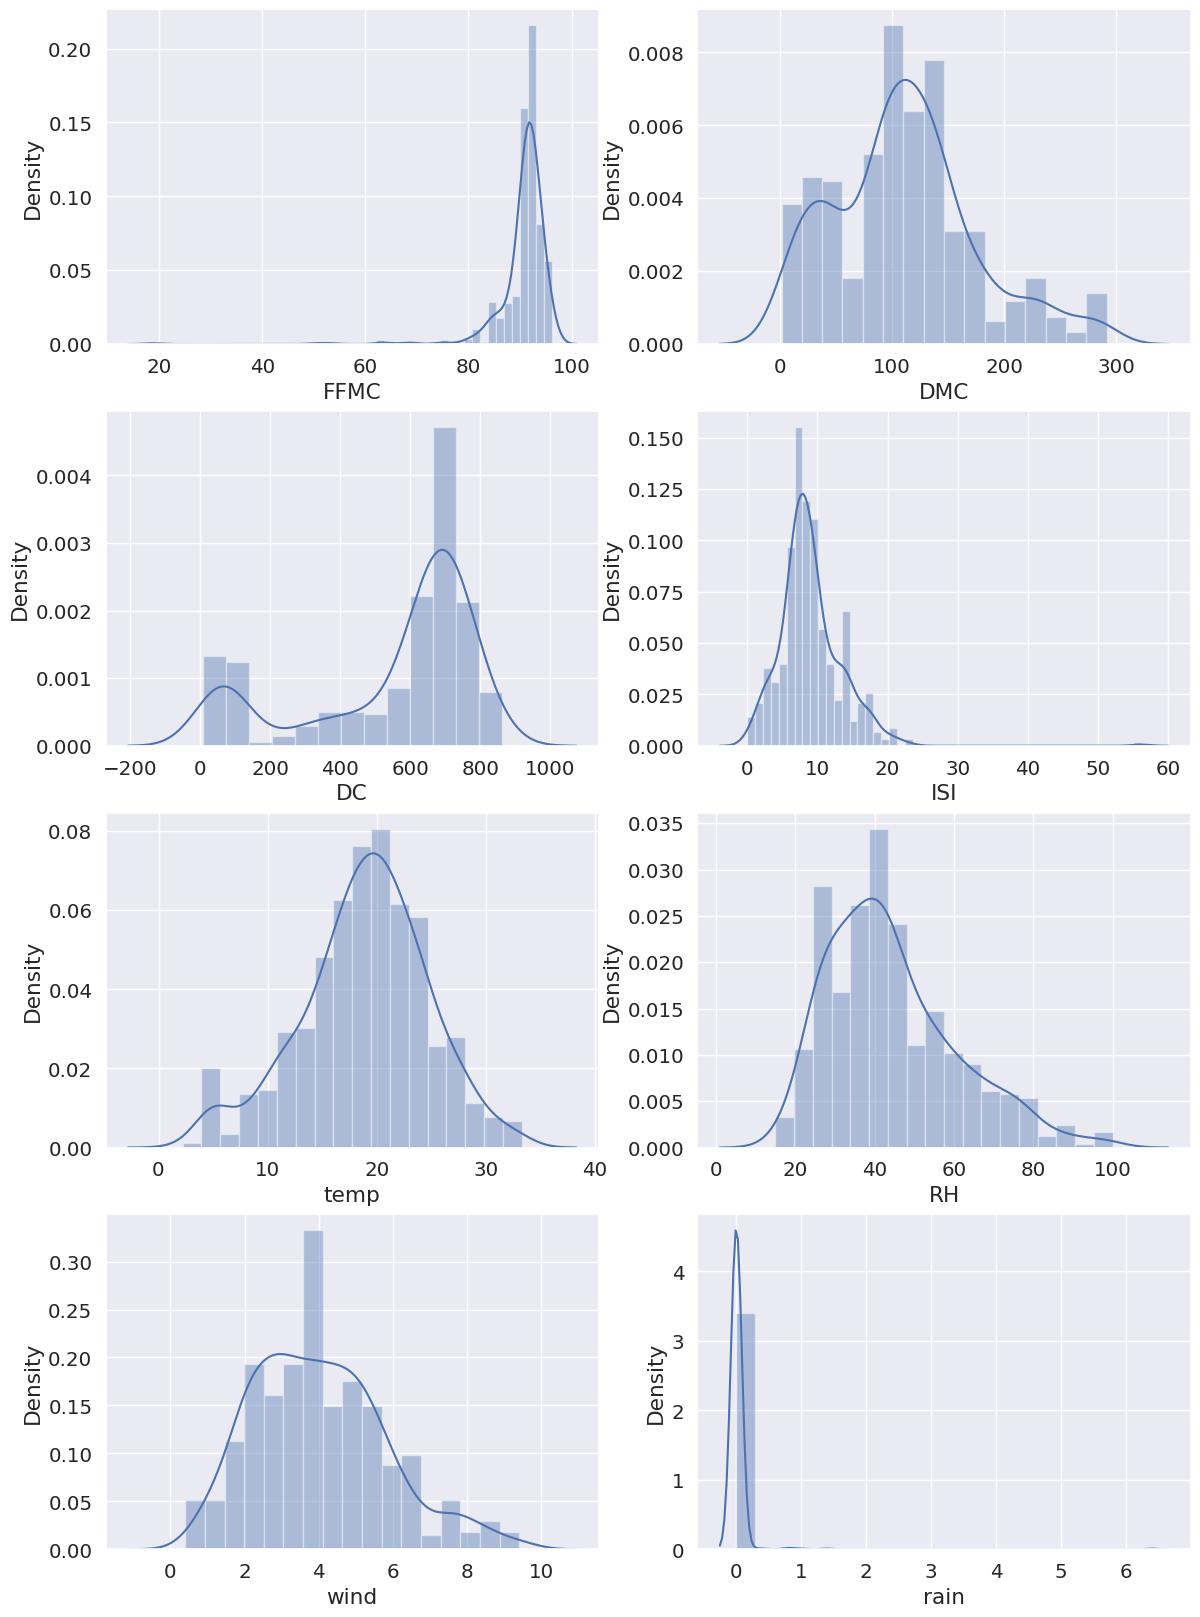

In [163]:
fig, ax = plt.subplots(4,2, figsize = (14,20))

sns.distplot(fire_data.FFMC, ax = ax[0,0])
sns.distplot(fire_data.DMC, ax = ax[0,1])
sns.distplot(fire_data.DC, ax = ax[1,0])
sns.distplot(fire_data.ISI, ax = ax[1,1])
sns.distplot(fire_data.temp, ax = ax[2,0])
sns.distplot(fire_data.RH, ax = ax[2,1])
sns.distplot(fire_data.wind, ax = ax[3,0])
sns.distplot(fire_data.rain, ax = ax[3,1])

plt.show()

In [164]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col],25)    # 1st quartile (25%)
        Q3 = np.percentile(df[col],75)    # 3rd quartile (75%)
        IQR = Q3 - Q1                     # Interquartile rrange (IQR)

        outlier_step = 1.5 * IQR          # outlier step

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(forest_fire[continuous_feature]))))

The dataset contains 3 observations with more than 2 outliers


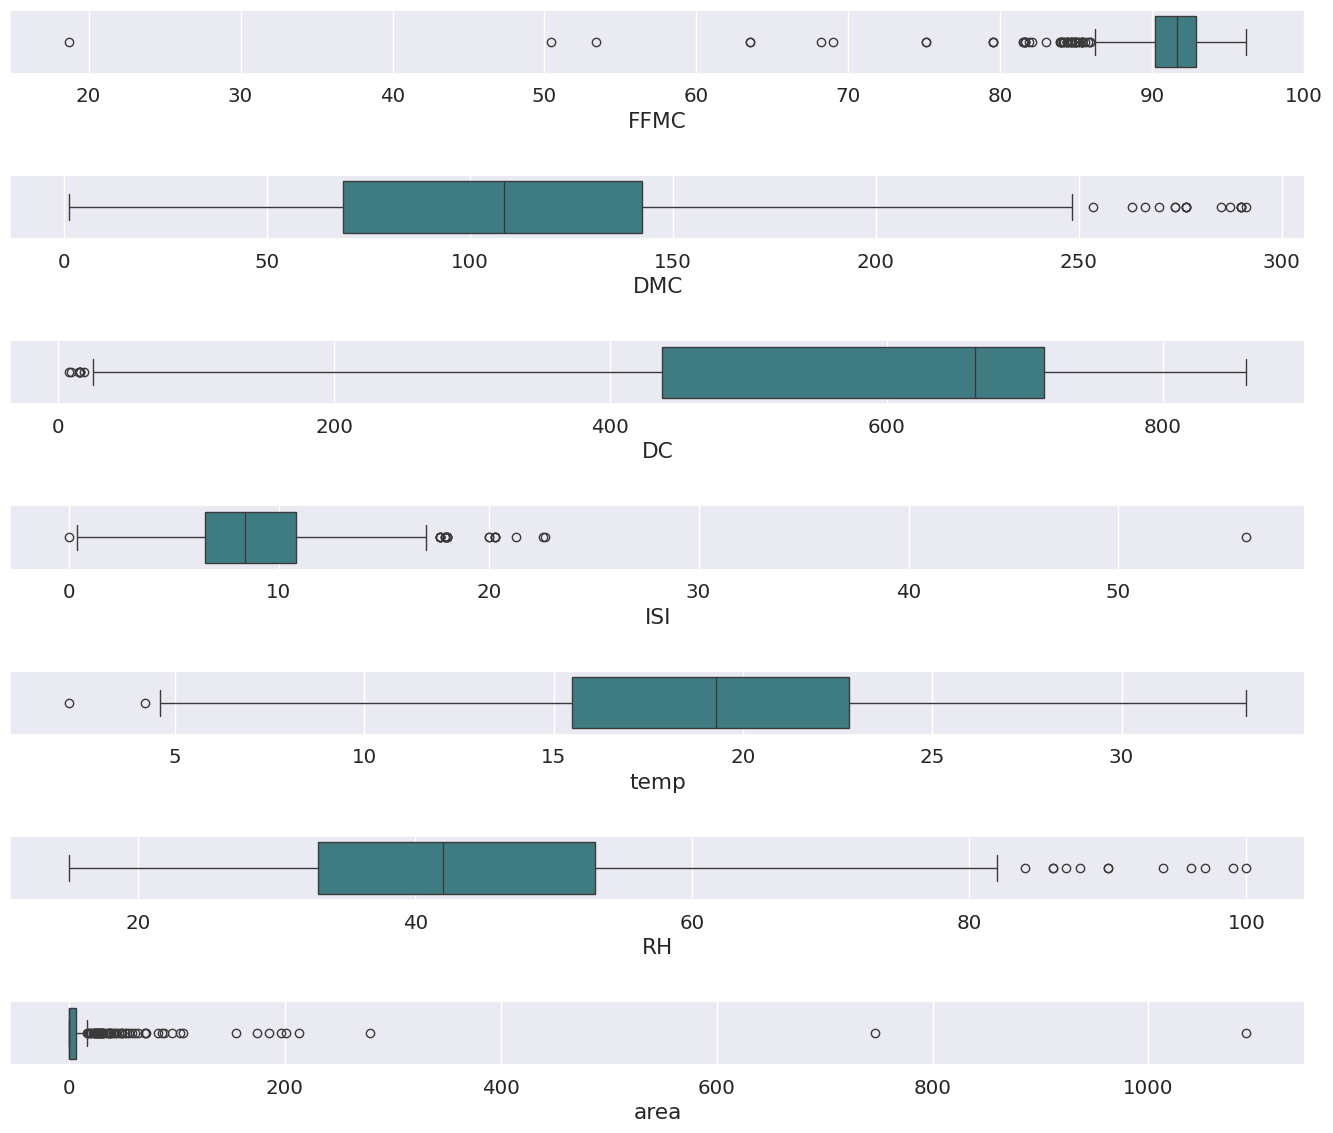

In [165]:
outlier = fire_data.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

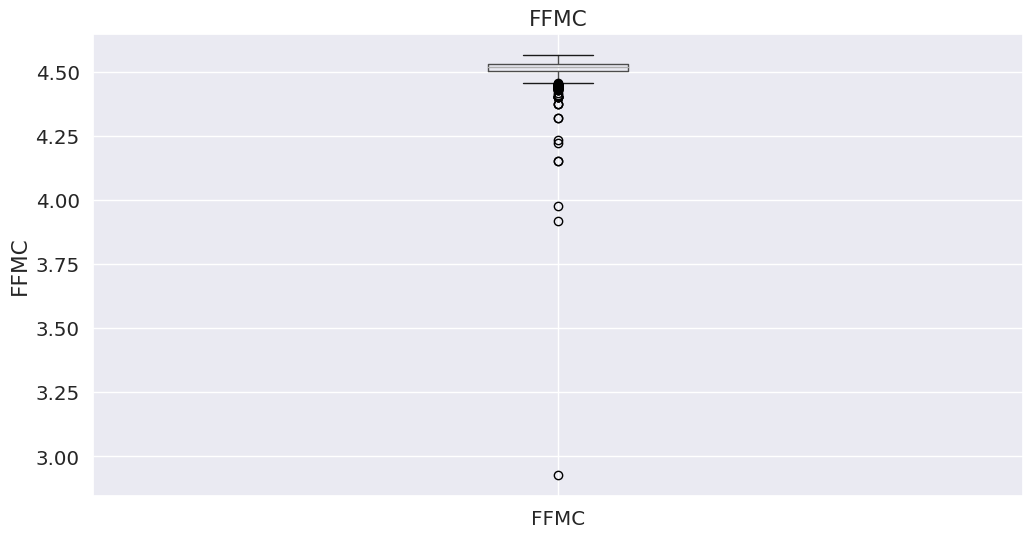

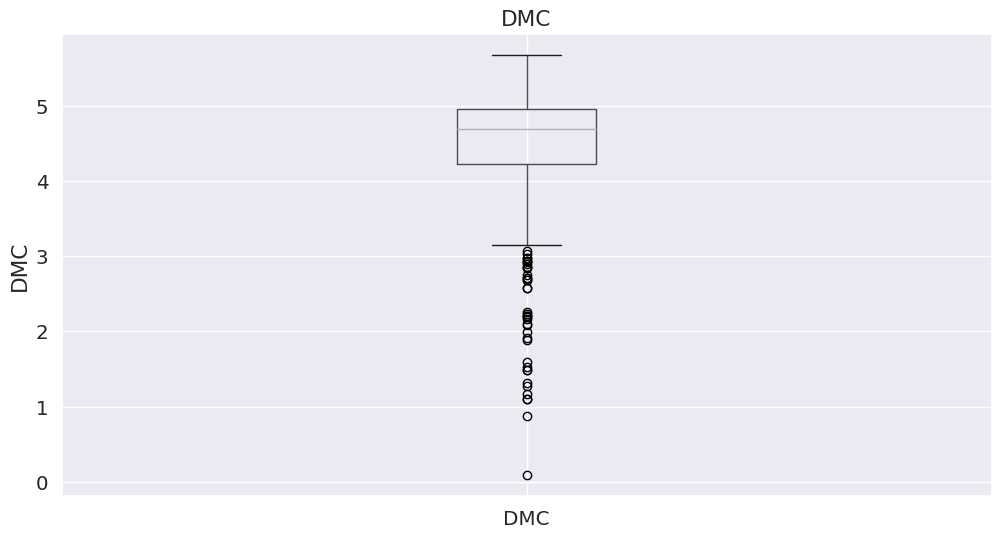

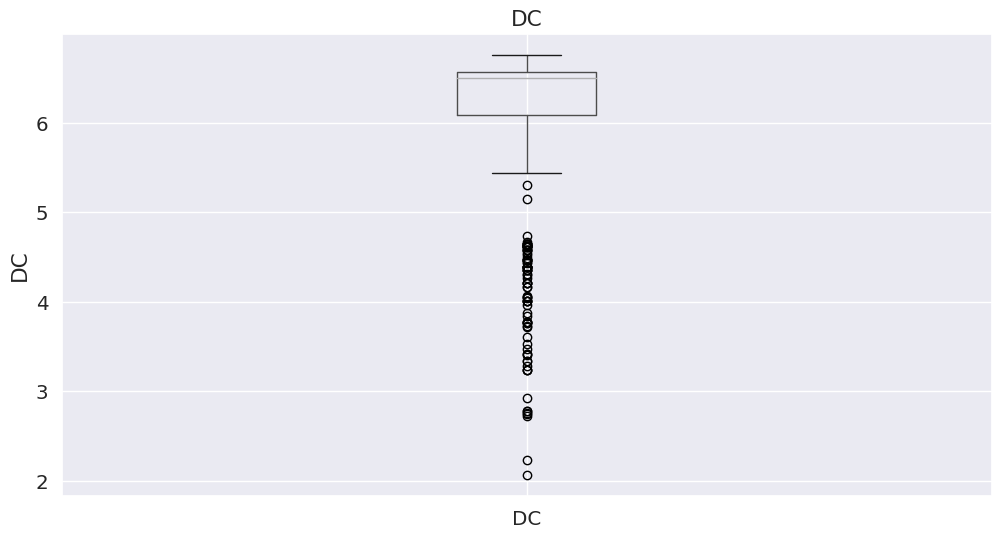

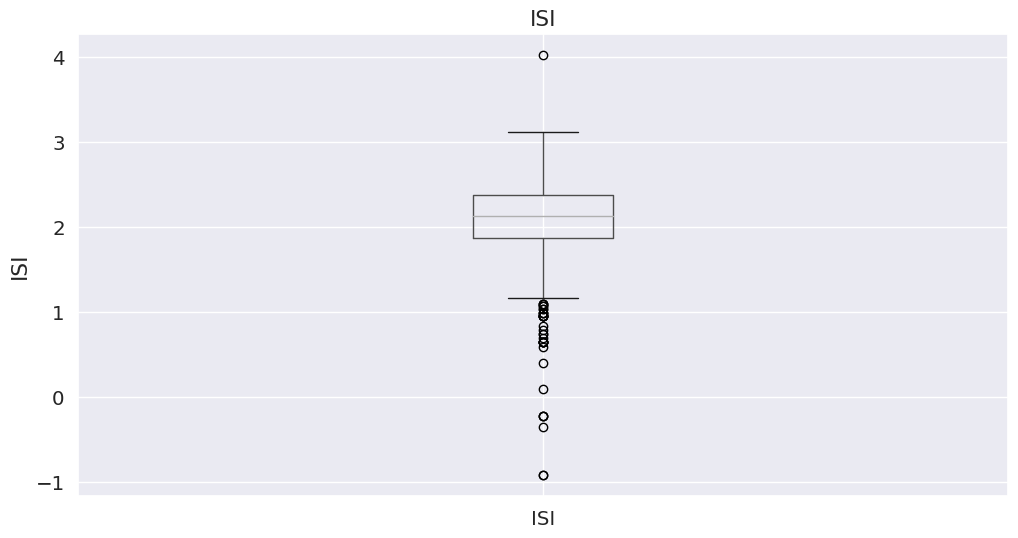

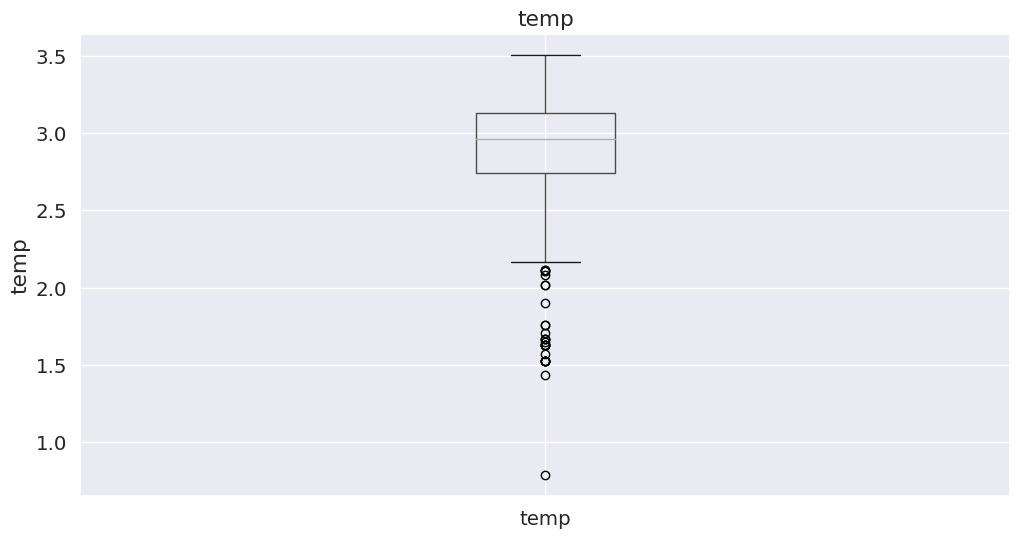

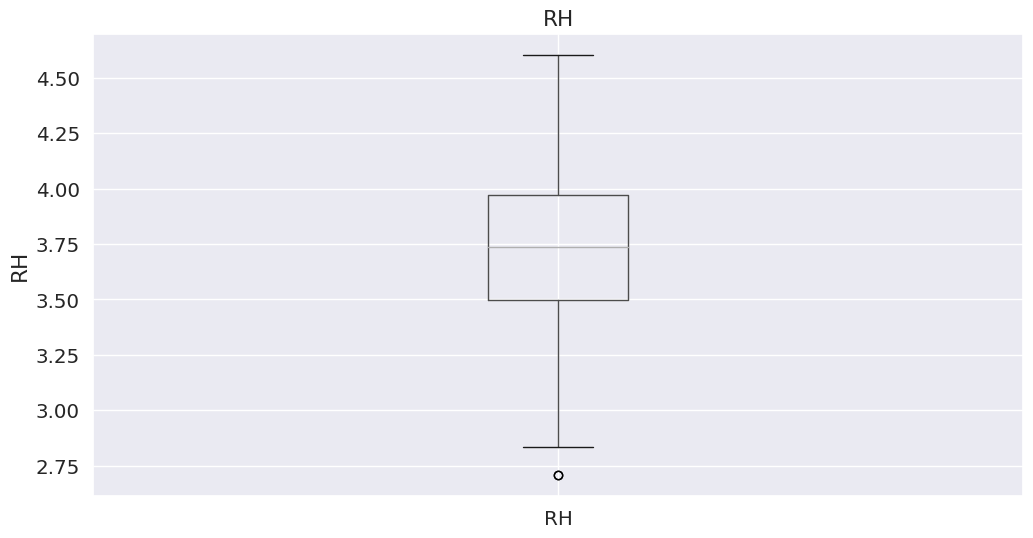

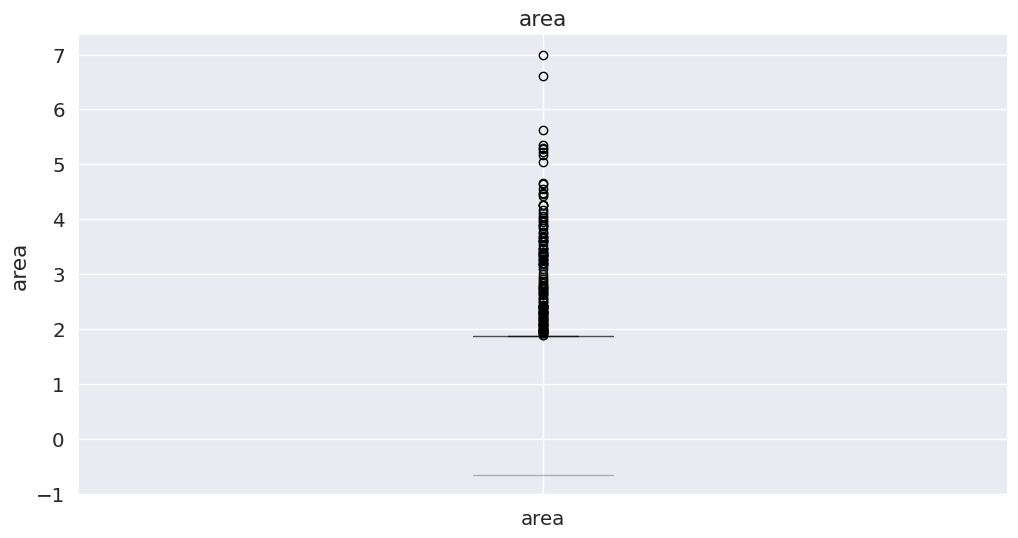

In [166]:
for feature in continuous_feature:
    data = fire_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


Skew: 12.846933533934868
Kurtosis: 194.1407210942299


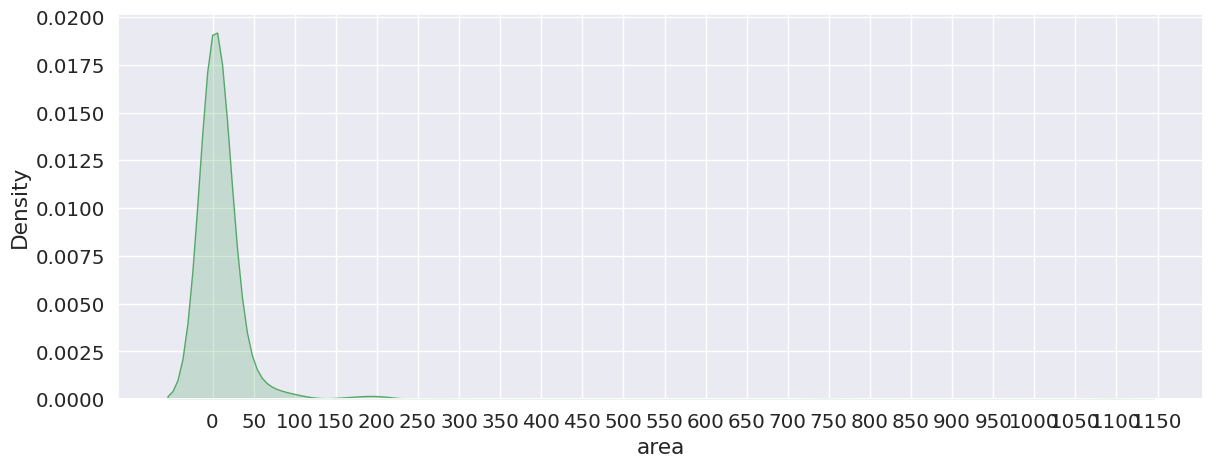

In [167]:
plt.figure(figsize=(14,5))
print("Skew: {}".format(fire_data['area'].skew()))
print("Kurtosis: {}".format(fire_data['area'].kurtosis()))
ax = sns.kdeplot(fire_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

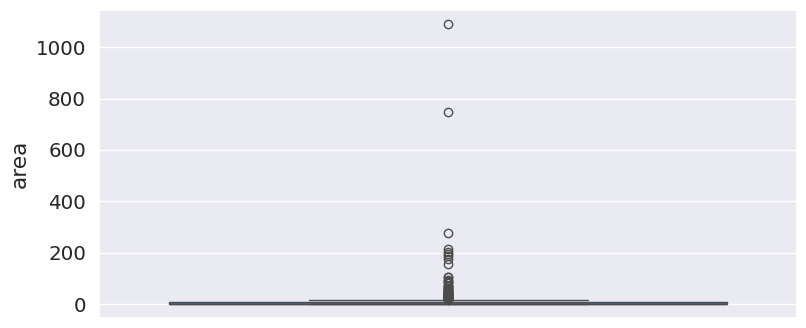

In [168]:
plt.figure(figsize=(9,4))
sns.boxplot(fire_data['area']);


In [169]:
categorical_features=[feature for feature in fire_data.columns if fire_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
forest_fire[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [170]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(fire_data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [171]:
for feature in fire_data.columns:
    if fire_data[feature].dtypes == 'object':      # in pandas it is object
        unique_cat = len(fire_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(fire_data[feature].value_counts())
        print()


Feature 'month' has 12 unique categories
month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

Feature 'day' has 7 unique categories
day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64

Feature 'size_category' has 2 unique categories
size_category
small    378
large    139
Name: count, dtype: int64



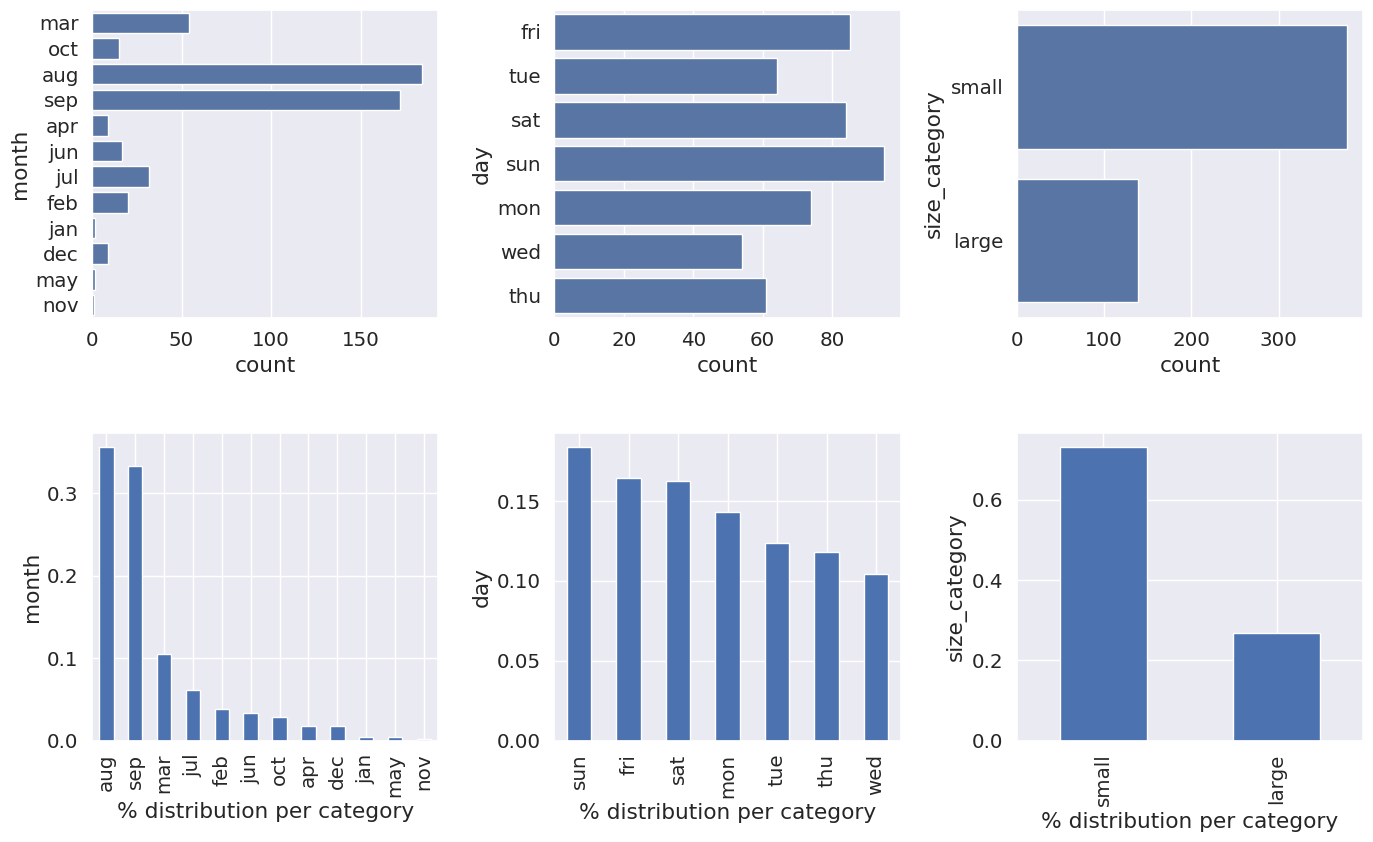

In [172]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data = fire_data,y=col)
    plt.subplot(3,3,i+3)
    fire_data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()


In [173]:
print(fire_data['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high

df = fire_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No damage


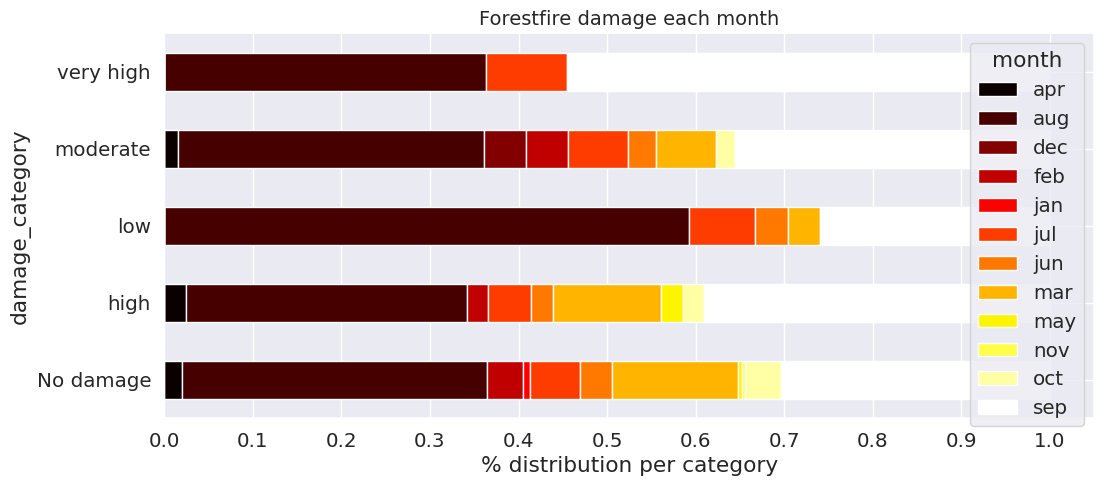

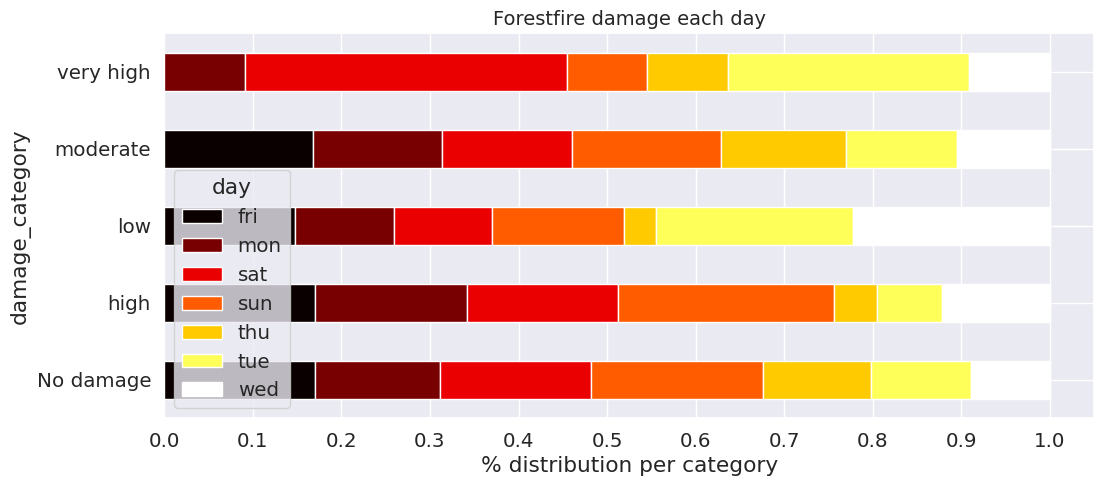

In [174]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,cmap='hot',figsize=(12,5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col), fontsize=14)

plt.show()

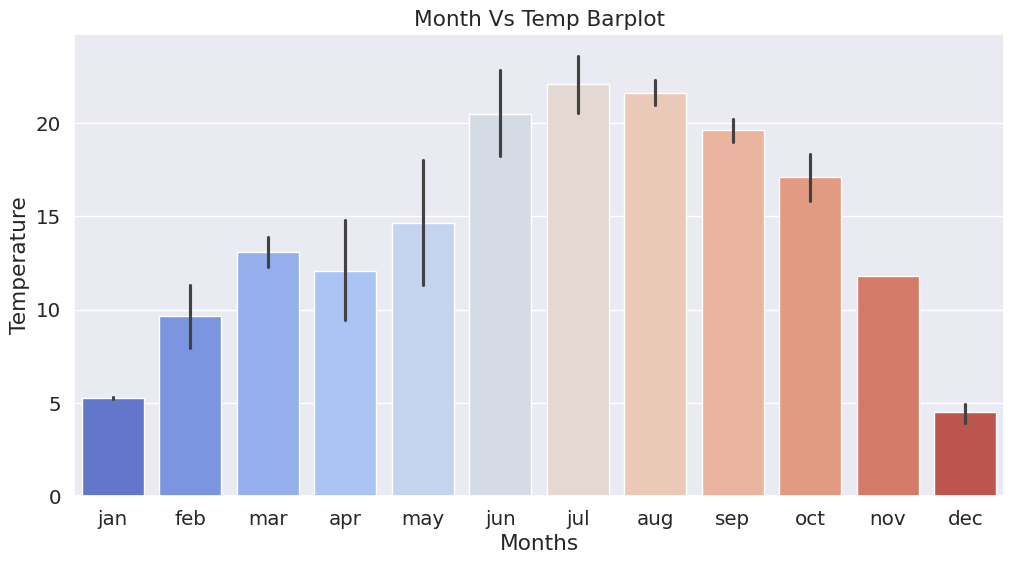

In [175]:
plt.rcParams['figure.figsize'] = [12,6]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = fire_data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm')
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

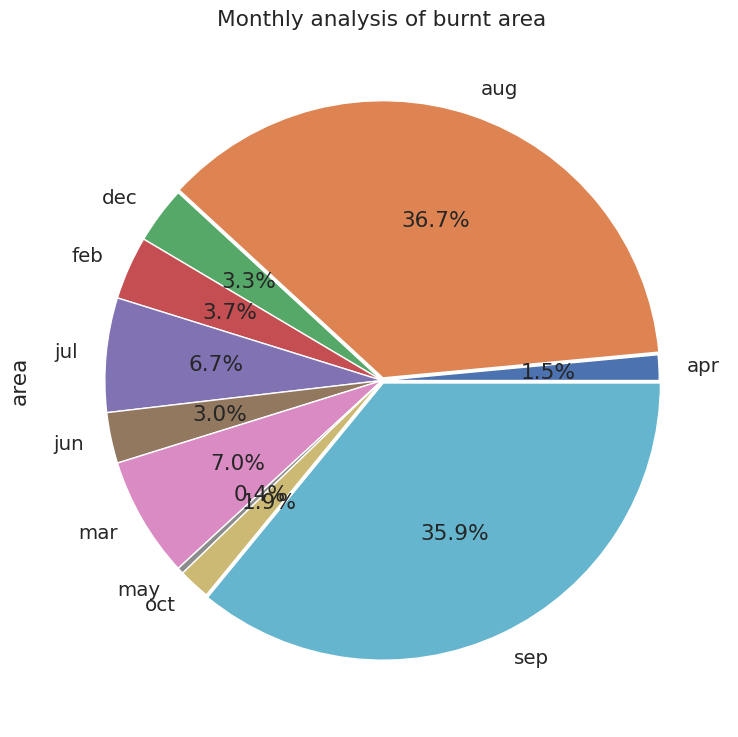

In [176]:
areaburnt = fire_data[fire_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.01,0,0,0,0,0,0,0,0.01],autopct='%0.1f%%')
plt.show()

In [177]:
import pandas as pd

# Sample data to replicate the scenario
data = {
    'size_category': ['small', 'large', 'small', 'large', 'small'],
    'month': ['jan', 'feb', 'mar', 'apr', 'may']
}
fire_data = pd.DataFrame(data)

# Copying the DataFrame
df1 = fire_data.copy()

# Replace abbreviated month names with full names
order = {
    'month': {
        'jan': 'January', 'feb': 'February', 'mar': 'March', 'apr': 'April',
        'may': 'May', 'jun': 'June', 'jul': 'July', 'aug': 'August',
        'sep': 'September', 'oct': 'October', 'nov': 'November', 'dec': 'December'
    }
}
df1 = df1.replace(order)

# Calculate percentage response
count_month_response_pct = pd.crosstab(df1['size_category'], df1['month']).apply(lambda x: x / x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

# Create month DataFrame with value counts
month_counts = df1['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], fill_value=0).rename_axis('month').reset_index(name='count')

# Add percentage columns
month_counts['% Small Forest Fire'] = count_month_response_pct.get('small', pd.Series([0]*12, index=month_counts['month']))
month_counts['% Large Forest Fire'] = count_month_response_pct.get('large', pd.Series([0]*12, index=month_counts['month']))

# Add index for sorting
month_counts['index'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Sort by the custom index
month_counts = month_counts.sort_values('index', ascending=True)

# Drop the index column
month_counts.drop('index', axis=1, inplace=True)

# Display the final DataFrame
print(month_counts)


        month  count  % Small Forest Fire  % Large Forest Fire
0     January      1                  NaN                  NaN
1    February      1                  NaN                  NaN
2       March      1                  NaN                  NaN
3       April      1                  NaN                  NaN
4         May      1                  NaN                  NaN
5        June      0                  NaN                  NaN
6        July      0                  NaN                  NaN
7      August      0                  NaN                  NaN
8   September      0                  NaN                  NaN
9     October      0                  NaN                  NaN
10   November      0                  NaN                  NaN
11   December      0                  NaN                  NaN


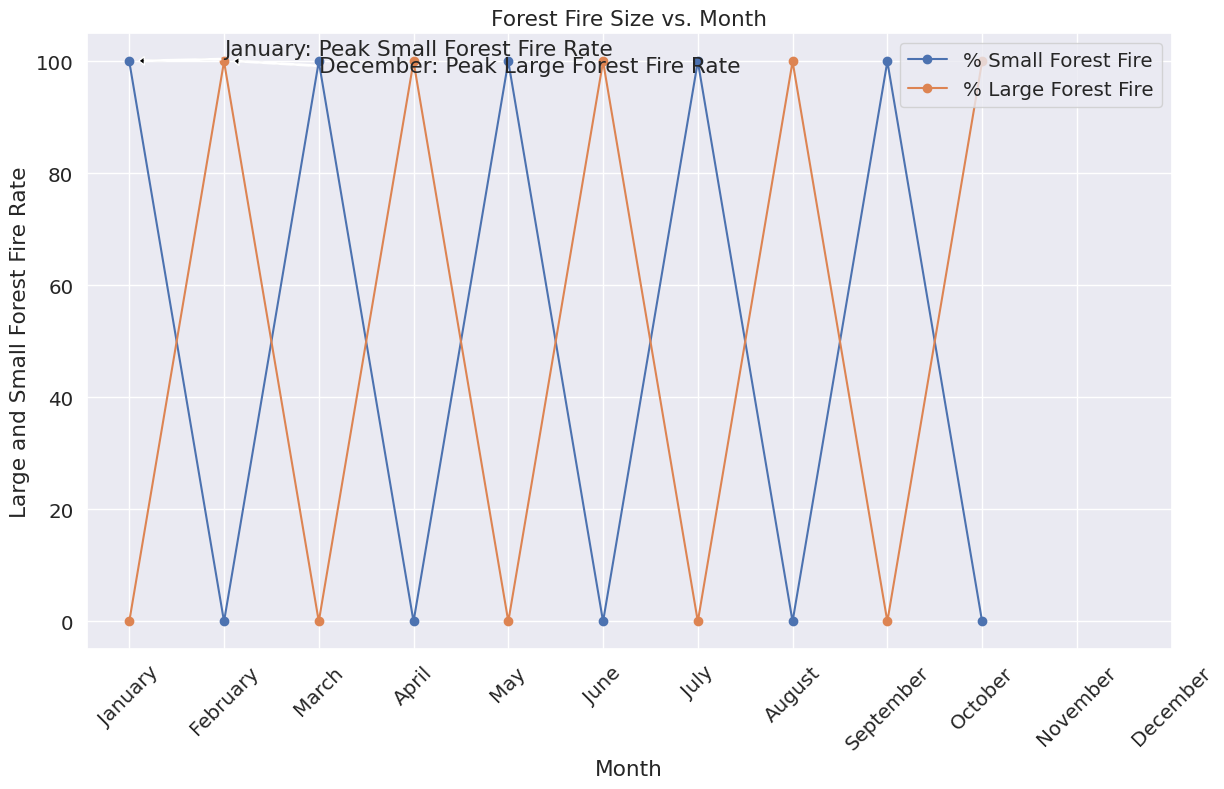

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data to replicate the scenario
data = {
    'size_category': ['small', 'large', 'small', 'large', 'small', 'large', 'small', 'large', 'small', 'large'],
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct']
}
fire_data = pd.DataFrame(data)

# Copying the DataFrame
df1 = fire_data.copy()

# Replace abbreviated month names with numbers
order = {'month':{'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}}
df1 = df1.replace(order)

# Calculate percentage response
count_month_response_pct = pd.crosstab(df1['size_category'], df1['month']).apply(lambda x: x / x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

# Create month DataFrame with value counts
month = pd.DataFrame(df1['month'].value_counts().sort_index())
month.columns = ['count']

# Ensure the DataFrame includes all months
all_months = pd.Index(range(1, 13))
month = month.reindex(all_months, fill_value=0)

# Add percentage columns
month['% Small Forest Fire'] = count_month_response_pct.get('small', pd.Series([0]*12, index=all_months))
month['% Large Forest Fire'] = count_month_response_pct.get('large', pd.Series([0]*12, index=all_months))

# Add Month names and indexes
month['Month'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month['index'] = month.index

# Sort by the custom index
month = month.sort_values('index', ascending=True)

# Drop the index column
month.drop('index', axis=1, inplace=True)

# Plotting
plot_month = month[['% Small Forest Fire', '% Large Forest Fire']].plot(kind='line', figsize=(14,8), marker='o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire Rate')
plt.xlabel('Month')

# Setting x-ticks
ticks = np.arange(1, 13, 1)
plt.xticks(ticks, month['Month'], rotation=45)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()


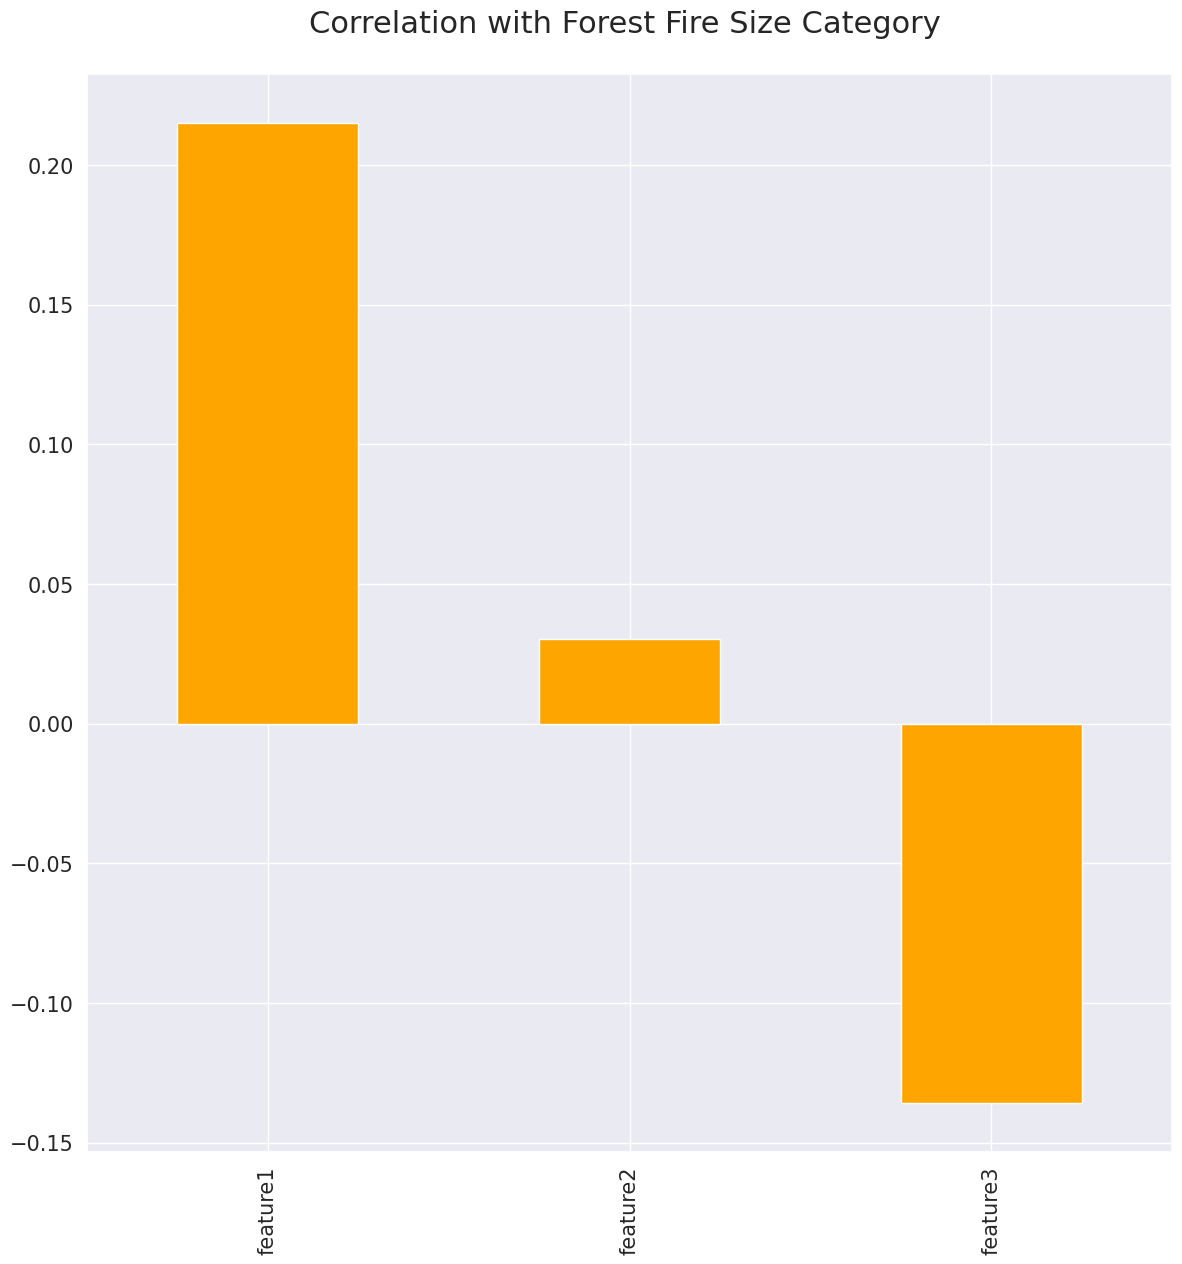

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data to replicate the scenario
fire_data = pd.DataFrame({
    'size_category': ['small', 'large', 'small', 'large', 'small', 'large', 'small', 'large', 'small', 'large'],
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct'],
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10),
    'feature3': np.random.rand(10)
})

# Copying the DataFrame
df = fire_data.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

# Sample forest_fire DataFrame with some numerical and non-numerical columns
forest_fire = pd.DataFrame({
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10),
    'feature3': np.random.rand(10),
    'feature4': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']  # Non-numerical column
})

# Ensure only numerical columns are used for correlation
numerical_forest_fire = forest_fire.select_dtypes(include=[np.number])

# Calculate correlations
correlations = numerical_forest_fire.corrwith(df['size_category'])
correlations = correlations[correlations != 1]
positive_correlations = correlations[correlations > 0].sort_values(ascending=False)
negative_correlations = correlations[correlations < 0].sort_values(ascending=False)

# Plot correlations
correlations.plot.bar(figsize=(14, 14), fontsize=15, color='orange', rot=90, grid=True)
plt.title('Correlation with Forest Fire Size Category \n', horizontalalignment="center", fontstyle="normal",
          fontsize="22", fontfamily="sans-serif")

plt.show()


In [180]:
fire_data.size_category.unique()

array(['small', 'large'], dtype=object)

In [181]:
countsizesmall = len(fire_data[fire_data.size_category == 'small'])
countsizelarge = len(fire_data[fire_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(fire_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(fire_data.size_category))*100)))

Percentage of Small Forest Fire Size: 50.00%
Percentage of Large Foreset Fire Size: 50.00%


In [182]:
fire_data.size_category.value_counts()

size_category
small    5
large    5
Name: count, dtype: int64

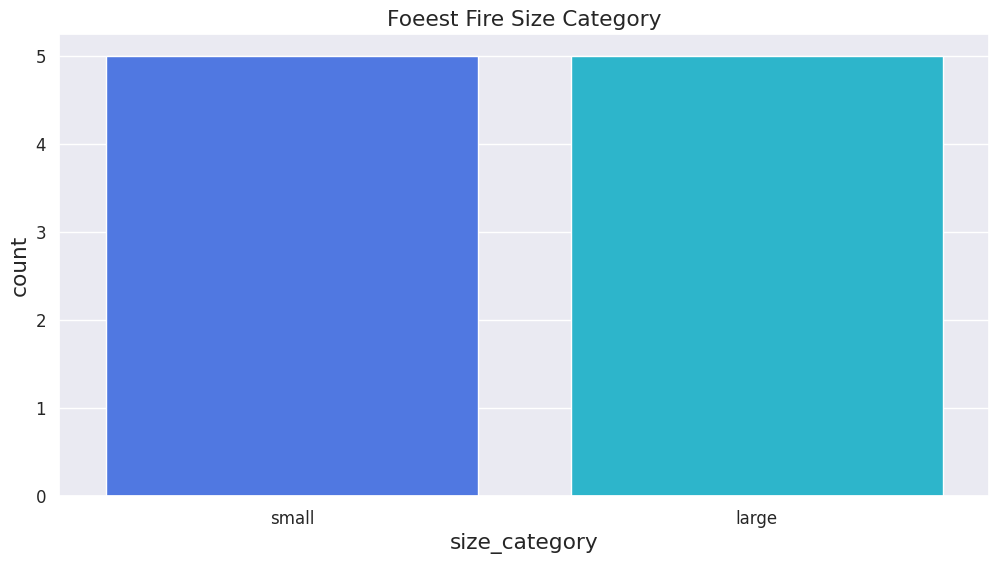

In [183]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data= fire_data, palette = pal, order= fire_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Foeest Fire Size Category');

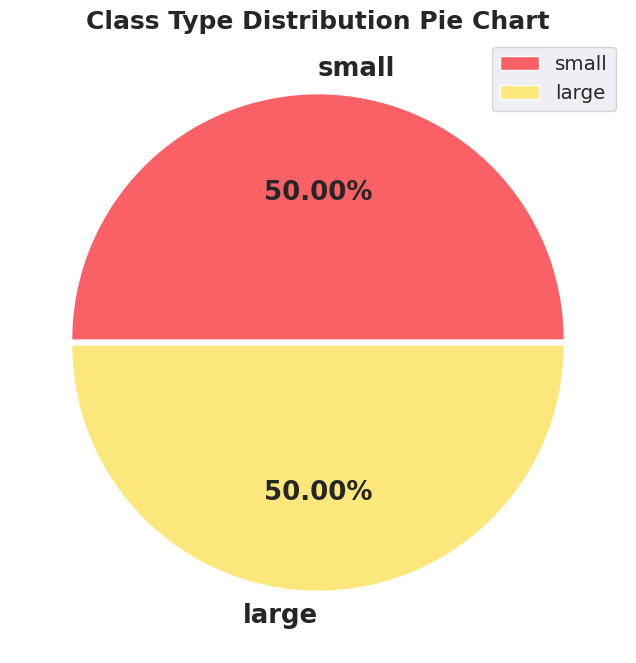

In [184]:
plt.figure(figsize = (8,8))
plt.pie(fire_data['size_category'].value_counts(), labels= fire_data.size_category.unique(),
        explode = [0.02,0.0], autopct= '%.2f%%', colors = ["#F96167", "#FCE77D"],
        textprops = {'size':'large', 'fontweight':'bold',})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

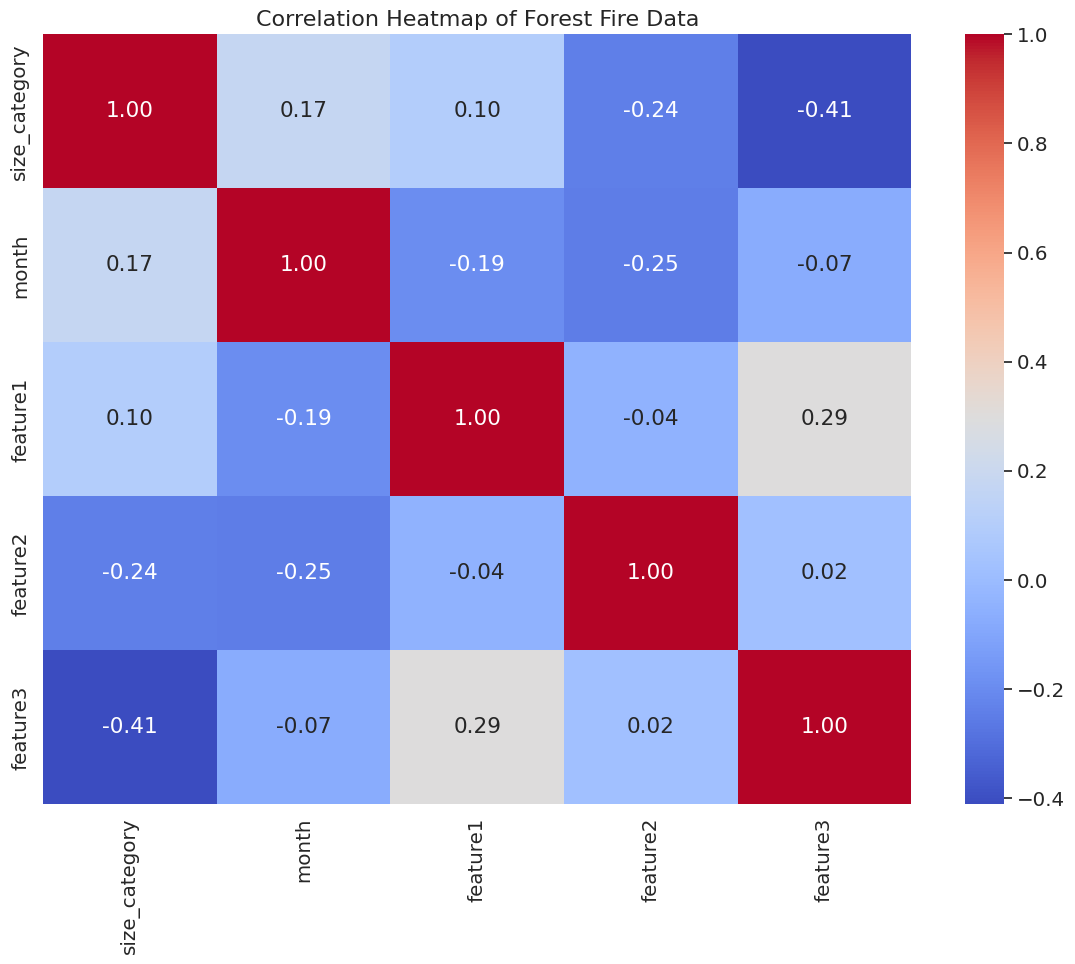

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data to replicate the scenario
fire_data = pd.DataFrame({
    'size_category': ['small', 'large', 'small', 'large', 'small', 'large', 'small', 'large', 'small', 'large'],
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct'],
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10),
    'feature3': np.random.rand(10)
})

# Convert 'size_category' to numerical
fire_data['size_category'] = np.where(fire_data['size_category'].str.contains("large"), 1, 0)

# Replace month names with numbers
order = {'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}
fire_data = fire_data.replace(order)

# Select only numerical columns for correlation
numerical_fire_data = fire_data.select_dtypes(include=[np.number])

# Create the heatmap
fig = plt.figure(figsize=(14, 10))
sns.heatmap(numerical_fire_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=90)
plt.title('Correlation Heatmap of Forest Fire Data', fontsize=16)
plt.show()


In [186]:
continuous_feature=[feature for feature in fire_data.columns if fire_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 5


In [187]:
fire_data[continuous_feature]

,size_category,month,feature1,feature2,feature3
0,0,1,0.079524,0.442511,0.511279
1,1,2,0.913893,0.307518,0.867084
2,0,3,0.143689,0.920354,0.922491
3,1,4,0.073780,0.940093,0.443687
4,0,5,0.235571,0.521183,0.403000
5,1,6,0.572807,0.829444,0.256088
6,0,7,0.604075,0.487547,0.825838
7,1,8,0.026852,0.239138,0.592136
8,0,9,0.296683,0.758615,0.892397
9,1,10,0.060001,0.159189,0.461577


In [188]:
df_standard_scaled = fire_data.copy()
features = df_standard_scaled[continuous_feature]

In [189]:
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,size_category,month,feature1,feature2,feature3
0,-1.0,-1.566699,-0.779823,-0.435642,-0.467248
1,1.0,-1.218544,2.162158,-0.933813,1.097031
2,-1.0,-0.870388,-0.553576,1.327776,1.340625
3,1.0,-0.522233,-0.800074,1.400618,-0.764414
4,-1.0,-0.174078,-0.229599,-0.145313,-0.943292


In [190]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1))

Mean
 size_category    0.0
month           -0.0
feature1         0.0
feature2         0.0
feature3         0.0
dtype: float64


In [191]:
print('Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Standard Devaition 
 size_category    1.0
month            1.0
feature1         1.0
feature2         1.0
feature3         1.0
dtype: float64 1


In [192]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

,month,feature1,feature2,feature3
0,-1.566699,-0.779823,-0.435642,-0.467248
1,-1.218544,2.162158,-0.933813,1.097031
2,-0.870388,-0.553576,1.327776,1.340625
3,-0.522233,-0.800074,1.400618,-0.764414
4,-0.174078,-0.229599,-0.145313,-0.943292


In [193]:
# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'
import pandas as pd
import numpy as np

# Sample data to replicate the scenario
fire_data = pd.DataFrame({
    'size_category': ['small', 'large', 'small', 'large', 'small', 'large', 'small', 'large', 'small', 'large'],
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct'],
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10),
    'feature3': np.random.rand(10)
})

# Copying the DataFrame
df = fire_data.copy()

# Converting string values into binary classes
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

# Verify the conversion
print(df.head())


   size_category month  feature1  feature2  feature3
0              0   jan  0.737923  0.901543  0.369191
1              1   feb  0.496109  0.706680  0.993052
2              0   mar  0.852661  0.578185  0.741820
3              1   apr  0.539605  0.158492  0.018277
4              0   may  0.833535  0.915694  0.371747


In [194]:
df.size_category.unique()

array([0, 1])

In [195]:
forest_fire.columns

Index(['feature1', 'feature2', 'feature3', 'feature4'], dtype='object')

In [196]:
data1 = pd.read_csv('/content/forestfires.csv')
data1.drop('size_category',axis=1, inplace =True)
data1 = pd.get_dummies(data1.iloc[:,:-1])


In [197]:
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,...,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False


In [198]:
data1['size_category'] = df1.size_category
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,...,False,False,False,False,False,True,False,False,False,False,False,False,True,False,large
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,...,False,False,False,False,False,True,False,False,False,True,False,False,False,False,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,large
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,...,False,False,True,False,False,False,False,False,False,False,True,False,False,False,small


In [199]:
le = LabelEncoder()
le.fit(data1["size_category"])
data1["size_category"]=le.transform(data1["size_category"])
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,...,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,...,False,False,False,False,False,True,False,False,False,True,False,False,False,False,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,...,False,False,True,False,False,False,False,False,False,False,True,False,False,False,1


In [200]:
X = data1.drop('size_category', axis = 1)
y=  data1.size_category

In [201]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [202]:
scores = fit.scores_
features = fit.transform(X)
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
2,179.977244,DC
1,136.076875,DMC
8,131.006903,area
5,30.837863,RH
37,10.275556,month_oct
26,10.275556,monthoct
4,8.204617,temp
23,4.690774,monthmar
34,4.690774,month_mar
3,1.711284,ISI


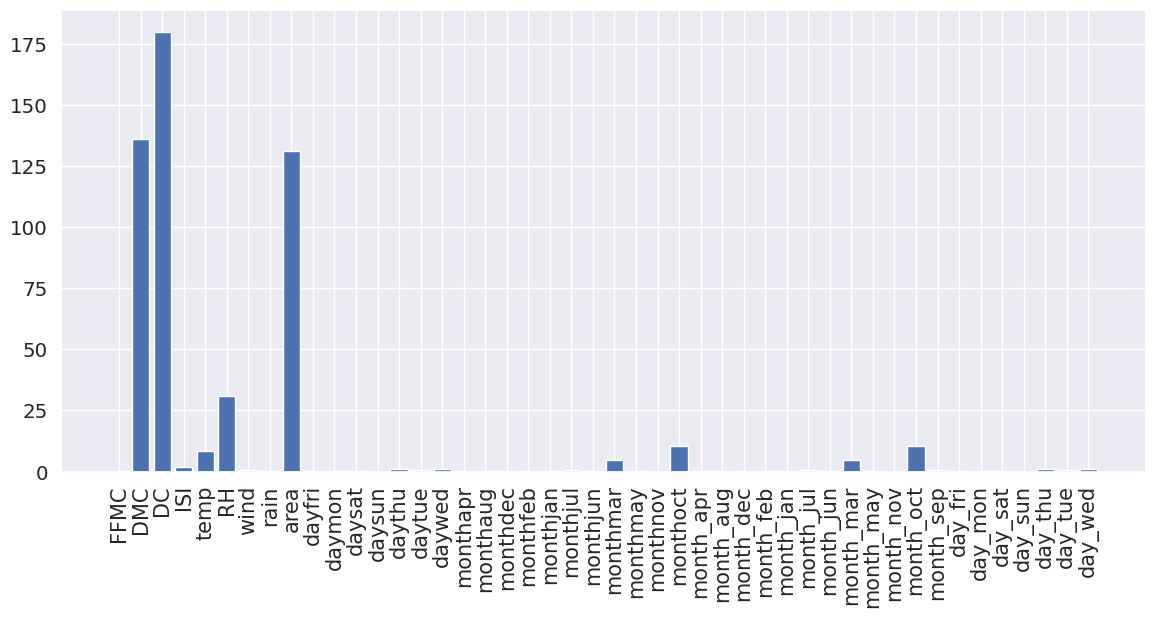

In [203]:
fig, axes = plt.subplots(figsize=(14,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

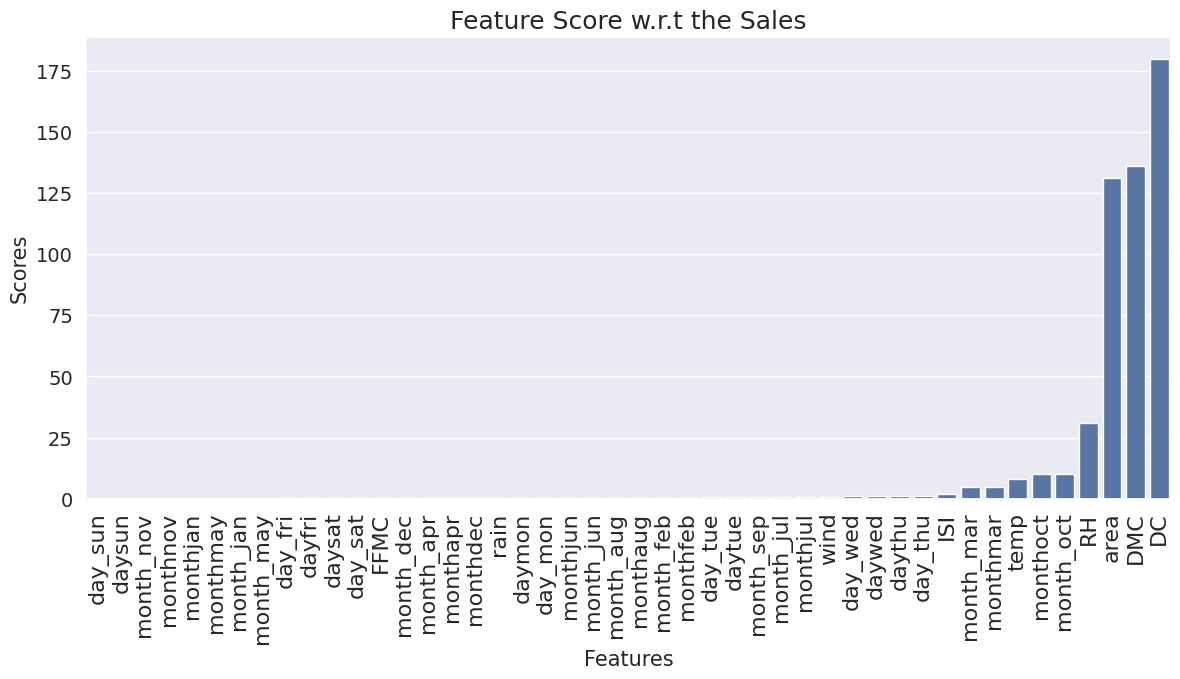

In [204]:
plt.figure(figsize=(14,6))
sns.barplot(x= 'Feature', y= "Score", data= score_df, order= score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [205]:
data1.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
       'day_tue', 'day_wed', 'size_category'],
      dtype='object')

In [206]:
import pandas as pd
model_data=data1[[ 'DMC', 'DC', 'RH', 'rain', 'wind', 'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
        'month_sep','size_category']]
model_data

,DMC,DC,RH,rain,wind,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,26.2,94.3,51,0.0,6.7,0.00,False,False,False,False,False,False,False,True,False,False,False,False,1
1,35.4,669.1,33,0.0,0.9,0.00,False,False,False,False,False,False,False,False,False,False,True,False,0
2,43.7,686.9,33,0.0,1.3,0.00,False,False,False,False,False,False,False,False,False,False,True,False,1
3,33.3,77.5,97,0.2,4.0,0.00,False,False,False,False,False,False,False,True,False,False,False,False,0
4,51.3,102.2,99,0.0,1.8,0.00,False,False,False,False,False,False,False,True,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,56.7,665.6,32,0.0,2.7,6.44,False,True,False,False,False,False,False,False,False,False,False,False,2
513,56.7,665.6,71,0.0,5.8,54.29,False,True,False,False,False,False,False,False,False,False,False,False,2
514,56.7,665.6,70,0.0,6.7,11.16,False,True,False,False,False,False,False,False,False,False,False,False,2
515,146.0,614.7,42,0.0,4.0,0.00,False,True,False,False,False,False,False,False,False,False,False,False,2


In [207]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)
len(x_train.columns)

18

In [209]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=100, step=32), activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [210]:
tuner = RandomSearch(build_model, objective= 'val_accuracy', max_trials= 5,
                     executions_per_trial=3, directory= 'project', project_name= 'Forest Fire')
tuner.search_space_summary()

Reloading Tuner from project/Forest Fire/tuner0.json
Search space summary
Default search space size: 19
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_v

In [211]:
tuner.search(x_train, y_train, epochs= 100, validation_data= (x_test, y_test))

In [212]:
tuner.results_summary()

Results summary
Results in project/Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
num_layers: 2
units_0: 32
units_1: 64
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 96
units_5: 64
units_6: 96
units_7: 32
units_8: 32
units_9: 96
units_10: 64
units_11: 32
units_12: 64
units_13: 96
units_14: 64
units_15: 32
units_16: 96
Score: 0.012820513142893711

Trial 3 summary
Hyperparameters:
num_layers: 15
units_0: 96
units_1: 64
learning_rate: 0.001
units_2: 96
units_3: 96
units_4: 96
units_5: 32
units_6: 96
units_7: 64
units_8: 64
units_9: 32
units_10: 96
units_11: 32
units_12: 96
units_13: 96
units_14: 32
units_15: 32
units_16: 32
Score: 0.012820512987673283

Trial 2 summary
Hyperparameters:
num_layers: 17
units_0: 32
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 96
units_6: 64
units_7: 96
units_8: 96
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15

In [213]:
def toFindBestParams(x_train, y_train, x_test, y_test):

    # Defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20 ]
    epoch_list      = [5 , 10 , 50 , 100]

    # Initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # Create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)

            # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]

            # Printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.011080332100391388
batch_size: 5 - epochs: 10 Accuracy: 0.011080332100391388
batch_size: 5 - epochs: 50 Accuracy: 0.011080332100391388
batch_size: 5 - epochs: 100 Accuracy: 0.011080332100391388
batch_size: 10 - epochs: 5 Accuracy: 0.011080332100391388
batch_size: 10 - epochs: 10 Accuracy: 0.011080332100391388
batch_size: 10 - epochs: 50 Accuracy: 0.011080332100391388
batch_size: 10 - epochs: 100 Accuracy: 0.011080332100391388
batch_size: 15 - epochs: 5 Accuracy: 0.011080332100391388
batch_size: 15 - epochs: 10 Accuracy: 0.011080332100391388
batch_size: 15 - epochs: 50 Accuracy: 0.011080332100391388
batch_size: 15 - epochs: 100 Accuracy: 0.011080332100391388
batch_size: 20 - epochs: 5 Accuracy: 0.011080332100391388
batch_size: 20 - epochs: 10 Accuracy: 0.011080332100391388
batch_size: 20 - epochs: 50 Accuracy: 0.011080332100391388
batch_size: 20 - epochs: 100 Accuracy: 0.011080332100391388


In [214]:
# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0345 - loss: 0.5999 - val_accuracy: 0.0000e+00 - val_loss: 0.3160
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0218 - loss: 0.2374 - val_accuracy: 0.0000e+00 - val_loss: -0.0025
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0085 - loss: -0.0632 - val_accuracy: 0.0000e+00 - val_loss: -0.2720
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0145 - loss: -0.3187 - val_accuracy: 0.0000e+00 - val_loss: -0.5167
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0094 - loss: -0.5595 - val_accuracy: 0.0000e+00 - val_loss: -0.7452
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0147 - loss: -0.7920 - val_accuracy: 0.0000e+00 - val_loss: -0.9597
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0190 - loss: -0.9965 - val_accuracy: 0.0000e+00 - val_loss: -1.1644
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0139 -

In [215]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0304 - loss: -15.3827 
compile_metrics: 0.97%


In [216]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

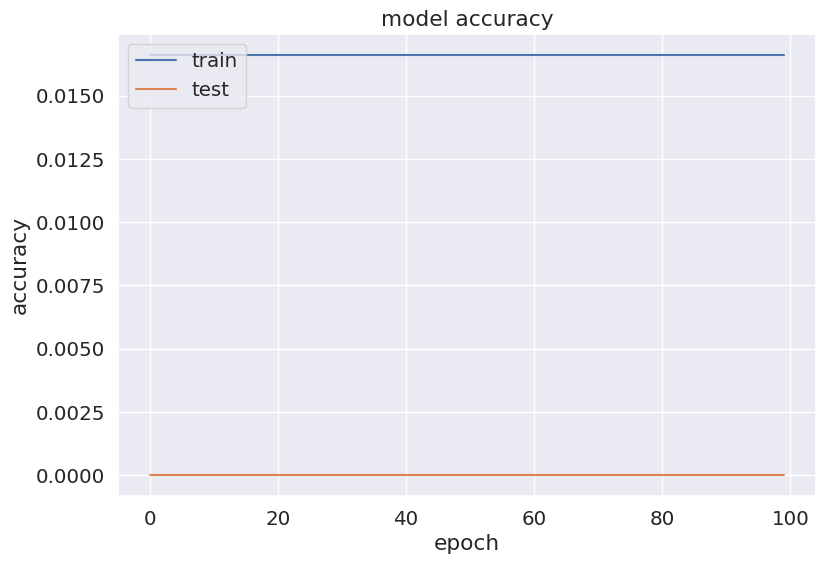

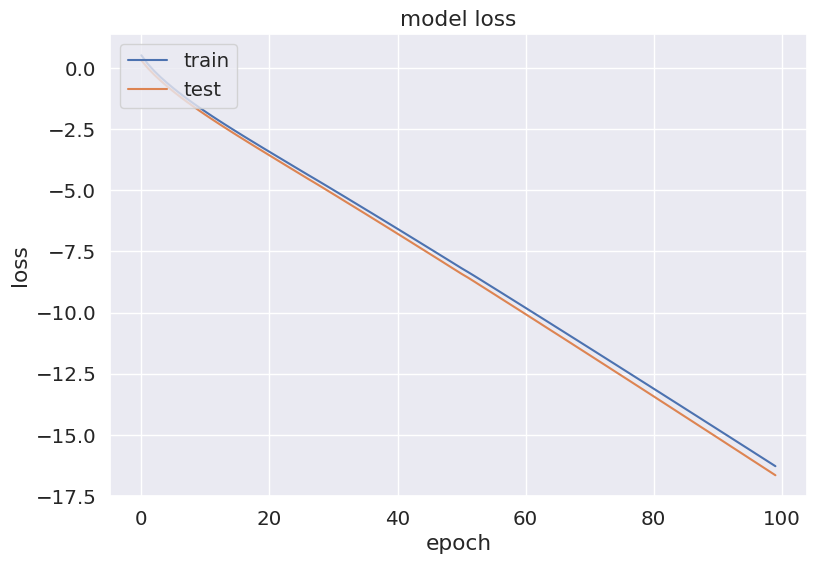

In [217]:
# summarize history for accuracy
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [218]:
# generating predictions for test data
y_predict_test = model.predict(x_test)

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(156, 3)


,Test_Actual,Test_Probability,Test_Predicted
318,2,1.0,1
30,2,1.0,1
182,2,1.0,1
284,2,1.0,1
512,2,1.0,1
236,2,1.0,1
361,2,1.0,1
346,2,1.0,1
443,2,1.0,1
326,2,1.0,1


In [219]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(361, 3)


,Train_Actual,Train_Probability,Train_Predicted
296,2,1.0,1
237,2,1.0,1
271,2,1.0,1
480,2,1.0,1
340,2,1.0,1
314,2,1.0,1
349,2,1.0,1
270,2,1.0,1
355,2,1.0,1
27,2,1.0,1


In [220]:
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Accuracy score for Test Data    =  1.0 %
Confusion Matrix for Test Data  =
 [[  0   2   0]
 [  0   1   0]
 [  0 153   0]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.01      1.00      0.01         1
           2       0.00      0.00      0.00       153

    accuracy                           0.01       156
   macro avg       0.00      0.33      0.00       156
weighted avg       0.00      0.01      0.00       156



In [221]:
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Accuracy score for Train Data    =  1.0 %
Confusion Matrix for Train Data  =
 [[  0   3   0]
 [  0   4   0]
 [  0 354   0]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.01      1.00      0.02         4
           2       0.00      0.00      0.00       354

    accuracy                           0.01       361
   macro avg       0.00      0.33      0.01       361
weighted avg       0.00      0.01      0.00       361



In [222]:
# print the scores on training and test set
y_predict_test = model.predict(x_test)
y_predict_train = model.predict(x_train)
print('Training set score : {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score     : {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training set score : 1.11%
Test set score     : 0.64%
